In [2]:
# Importing the necessary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [3]:
# Importing the data
df = pd.read_csv("Data.csv")

In [4]:
print("Dataset Length: ", len(df))
print("Dataset Shape: ", df.shape)

Dataset Length:  1000
Dataset Shape:  (1000, 6)


In [5]:
print("Dataset: ")
df.head()

Dataset: 


,Initial payment,Last payment,Credit Score,House Number,sum,Result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [6]:
# Drop the "sum" column ( is there for an unknown reason )
df = df.drop(columns=['sum'])
df.head()

,Initial payment,Last payment,Credit Score,House Number,Result
0,201,10018,250,3046,yes
1,205,10016,395,3044,yes
2,257,10129,109,3251,yes
3,246,10064,324,3137,yes
4,117,10115,496,3094,yes


In [7]:
# Separate target variable
X = df.values[:, :-1] # All columns except the last one
Y = df.values[:, -1]  # The last column (Result)

# Splitting Data into Test and Train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

# Perform training with Entropy
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=2, min_samples_leaf=5)

# Training!
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5,
                       random_state=100)

In [8]:
# Function to make predictions
y_pred_en = clf_entropy.predict(X_test)

In [9]:
# Checking accuracy
print("Accuracy is ", accuracy_score(y_test, y_pred_en)*100)

Accuracy is  89.33333333333333


[Text(0.5, 0.8333333333333334, 'Last payment <= 12545.0\nentropy = 0.997\nsamples = 700\nvalue = [374, 326]'),
 Text(0.25, 0.5, 'Last payment <= 11566.5\nentropy = 0.534\nsamples = 345\nvalue = [42, 303]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.045\nsamples = 204\nvalue = [1, 203]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.87\nsamples = 141\nvalue = [41, 100]'),
 Text(0.75, 0.5, 'Last payment <= 13235.5\nentropy = 0.346\nsamples = 355\nvalue = [332, 23]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.788\nsamples = 89\nvalue = [68, 21]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.064\nsamples = 266\nvalue = [264, 2]')]

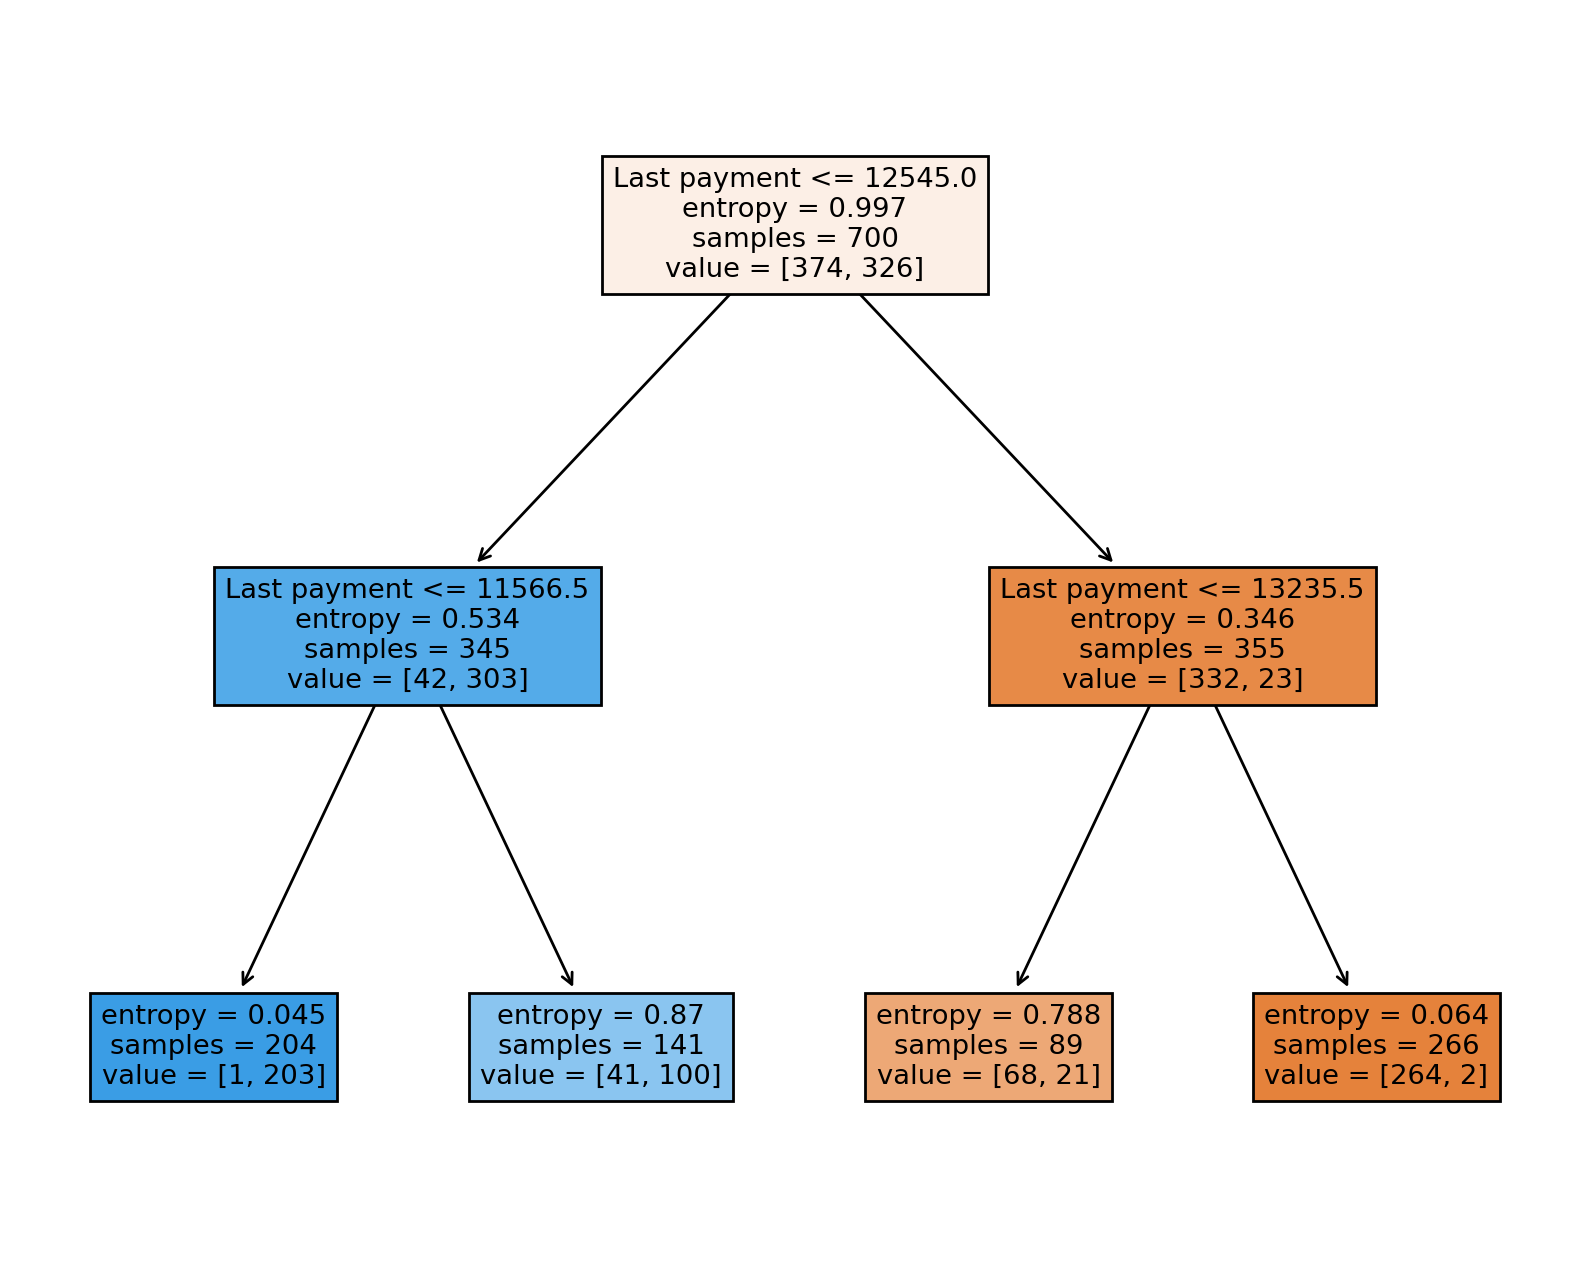

In [10]:
# Visualizing the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 8), dpi=200)
plot_tree(clf_entropy, feature_names=df.columns, filled=True)